In [1]:
#python
import numpy as np
import pandas as pd

In [2]:
#graph
import matplotlib.pyplot as plt

In [4]:
#ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#assign column names
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
#number of rows
len(dataset)

150

In [14]:
#number of columns
len(list(dataset))

5

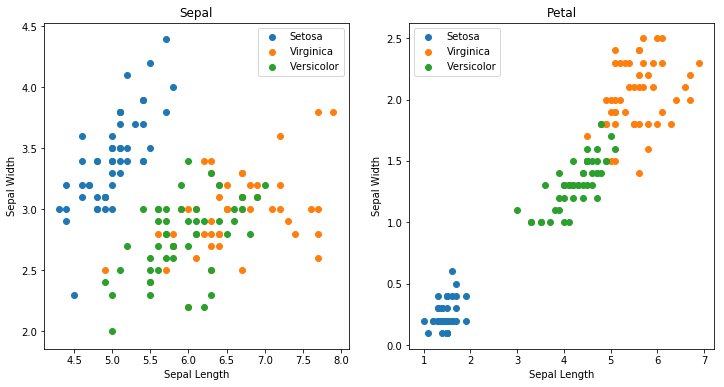

In [39]:
#sort by class
setosa = dataset[dataset['Class']=='Iris-setosa']
virginica = dataset[dataset['Class']=='Iris-virginica']
versicolor = dataset[dataset['Class']=='Iris-versicolor']

#vizualise dataset for sepal length & width

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(setosa['sepal-length'],setosa['sepal-width'])
plt.scatter(virginica['sepal-length'],virginica['sepal-width'])
plt.scatter(versicolor['sepal-length'],versicolor['sepal-width'])
plt.title('Sepal')
plt.legend(('Setosa','Virginica','Versicolor'))
plt.xlabel('Sepal Length')  
plt.ylabel('Sepal Width')  

#vizualise dataset for petal length & width

plt.subplot(1,2,2)
plt.scatter(setosa['petal-length'],setosa['petal-width'])
plt.scatter(virginica['petal-length'],virginica['petal-width'])
plt.scatter(versicolor['petal-length'],versicolor['petal-width'])
plt.title('Petal')
plt.legend(('Setosa','Virginica','Versicolor'))
plt.xlabel('Sepal Length')  
plt.ylabel('Sepal Width')  
plt.show()

In [40]:
#trim dataset to choose only 2 class
trim = pd.concat([virginica,versicolor])
len(trim)

100

In [44]:
trim.iloc[:,2:-1].values
X = trim.iloc[:,2:-1].values
Y = trim.iloc[:,4].values 

In [49]:
#ML
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3)
len(X_train)
len(Y_test)

30

In [51]:
df_train = pd.DataFrame({'data1':X_train[:,0],'data2':X_train[:,1],'class':Y_train})
df_train

,data1,data2,class
0,5.2,2.3,Iris-virginica
1,5.4,2.3,Iris-virginica
2,6.3,1.8,Iris-virginica
3,3.9,1.2,Iris-versicolor
4,4.9,1.8,Iris-virginica
5,4.8,1.8,Iris-virginica
6,4.1,1.0,Iris-versicolor
7,6.1,2.5,Iris-virginica
8,3.5,1.0,Iris-versicolor
9,4.4,1.4,Iris-versicolor


In [55]:
virginica_train = df_train[df_train["class"]=='Iris-virginica'] 
versicolor_train = df_train[df_train["class"]=='Iris-versicolor'] 
X_test[:,0]

array([3. , 6.9, 5.6, 5.6, 5.3, 4.2, 5. , 4.7, 6.6, 5.1, 4.7, 4.8, 3.6,
       5.1, 5.6, 5.7, 4.1, 5.4, 4.5, 4.2, 3.3, 4. , 5.6, 4.5, 4.7, 4.8,
       6.7, 5.1, 5.7, 4. ])

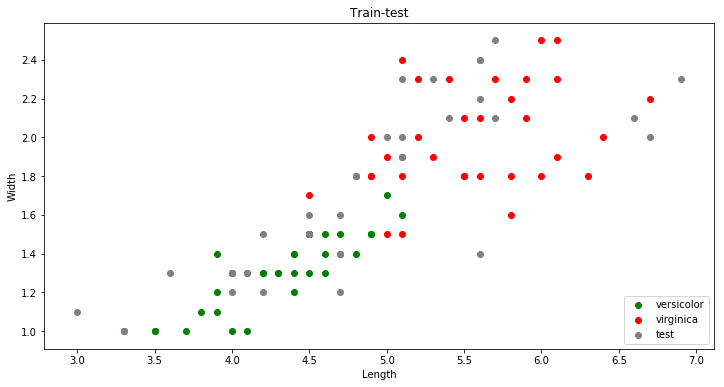

In [57]:
#plot the dftrain
plt.figure(figsize=(12,6))
plt.scatter(versicolor_train['data1'], versicolor_train['data2'], c='g', label = 'versicolor')
plt.scatter(virginica_train['data1'], virginica_train['data2'], c ='r', label = 'virginica')
plt.scatter(X_test[:,0],X_test[:,1], c= 'gray', label= 'test')
plt.legend(loc = 4)
plt.title('Train-test')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

In [66]:
#transforming data into scalar form for ML
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)


In [63]:
#train K-NN classifier

Classifier = KNeighborsClassifier(n_neighbors=5)
Classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [69]:
pred = Classifier.predict(X_test)

In [70]:
pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)

In [137]:
#calculate accuracy of the model

acc= accuracy_score(y_test,pred)
acc

0.9111111111111111

In [76]:
#test for all 4 variables
X = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,4].values

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
scalar = StandardScaler()
scalar.fit(X_train)
classifier = KNeighborsClassifier(n_neighbors = 3)
#training
classifier.fit(X_train, y_train)

#testing
pred = classifier.predict(X_test)
acc = accuracy_score(y_test, pred)
acc

0.9111111111111111

In [107]:
error=[]
#Calculation of error for k values between 1 and 40

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=Y_test))

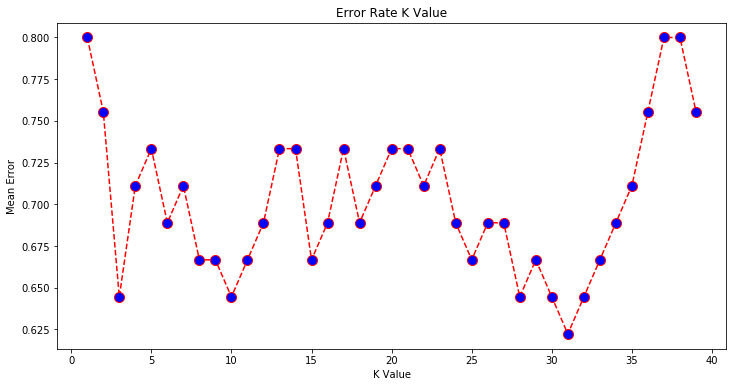

In [139]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color = 'red', linestyle ='dashed', marker = 'o',
        markerfacecolor = 'blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()